In [1]:
%load_ext autoreload
%autoreload 2
from fun import *
os.environ['QT_QPA_PLATFORM']='offscreen'

### AKAP79

In [2]:
ref = 'Homo_sapiens'
# Multiple Sequence Alignment using MUSCLE
seq_filename = 'fasta_files/akap5_seq_prot.fa'
msa_filename = 'fasta_files/msa/akap5_seq_align.fa'
# subprocess.call(["muscle","-align", seq_filename, "--output", msa_filename], 
#                 stdout=subprocess.DEVNULL,
#                 stderr=subprocess.STDOUT)

In [3]:
# Parse msa and original sequences
akap5_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(seq_filename),'fasta')}
akap5_msa_seqs = {fasta.id:str(fasta.seq) for fasta in SeqIO.parse(open(msa_filename),'fasta')}
host_guest_dict = species_host_to_guest_map_dic()

#### 1. Calmodulin (CaM) - WSK domain - [Patel et al. Nature (2017)](https://www.nature.com/articles/s41467-017-01715-w)

In [4]:
base_string_wsk = 'RGAWASLKRLVTRRKRSESSKQQKPLEGEM'
compiled_regex = re.compile('(-)*'.join(list(base_string_wsk)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()

compiled_regex_motif = re.compile('(-)*'.join(list('WASLK')))
i, iii = compiled_regex_motif.search(akap5_msa_seqs[ref]).span()
wsk_residues_idx = (i,i+2,iii-1)

In [5]:
filename = 'fasta_files/binding_regions/AKAP5_WSK.fa'
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs,
                                         akap5_seqs,
                                         start, end,
                                         filename,
                                         motif_coords=wsk_residues_idx)
# alv.view(aln)

#### 2. Calcineurin (PP2B) - PIAIIT motif- [ref](http://slim.icr.ac.uk/motifs/calcineurin/index.php?page=overview#pixixt)

In [6]:
base_string_piaiit = 'MEPIAIIITDTE'
compiled_regex = re.compile('(-)*'.join(list(base_string_piaiit)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()
filename = 'fasta_files/binding_regions/AKAP5_PIIT.fa'
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs, akap5_seqs, start, end, filename, [], 'PIIT', regions_dict)

#### 3. PKA - RII binding domain- [Church et al. eLife (2021)](https://elifesciences.org/articles/68164)

In [7]:
base_string_rii_binding = 'LLIETASSLVKNAIQLSIEQL'
compiled_regex = re.compile('(-)*'.join(list(base_string_rii_binding)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()
filename = 'fasta_files/binding_regions/AKAP5_RII_binding_1.fa'
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs, akap5_seqs, start, end,filename, [], 'RII_binding_1',  regions_dict)

#### 4. PKC binding - [Faux et al. jbc (1997)](https://reader.elsevier.com/reader/sd/pii/S0021925818393281?token=41EEC70C8926EE5A9CD0F774A8DB46B41F4C8DD5470424CC4351BE2FFFE89CE95151AA97ACAC6FC2259E36778809C633&originRegion=us-east-1&originCreation=20220721161621)

In [8]:
base_string_pkc = 'KASMLCFKRRKKAAKALKPKAG'
compiled_regex = re.compile('(-)*'.join(list(base_string_pkc)))
start, end = compiled_regex.search(akap5_msa_seqs[ref]).span()
filename = 'fasta_files/binding_regions/AKAP5_PKC.fa'
regions_dict, aln = seq_domain_alignment(akap5_msa_seqs, akap5_seqs, start, end,filename, [], 'PKC', regions_dict)

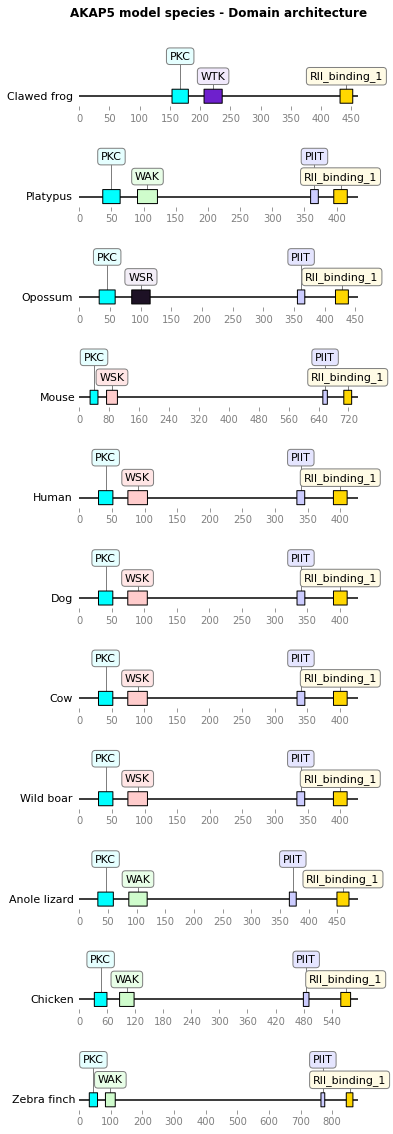

In [9]:
title = 'AKAP5 model species - Domain architecture'
visualize_structure(host_guest_dict, regions_colors(regions_dict), regions_dict, title, akap5_seqs)

In [ ]:
# #Notes:
# Is PKC in frog? what changed in the allignment from previous results?